In [2]:
import pymc3 as pm

In [3]:
with pm.Model() as model:
    param = pm.Exponential("poisson_param", 1.0)
    data_generator = pm.Poisson("data_generataor", param)

In [4]:
with model:
    data_generator_one = data_generator + 1

In [6]:
param.tag.test_value

array(0.6931471824645996)

In [7]:
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", 1.0)
    lambda_2 = pm.Exponential("lambda_2", 1.0)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)

In [8]:
lambda_1 + lambda_2

Elemwise{add,no_inplace}.0

In [9]:
lambda_1 + lambda_2

Elemwise{add,no_inplace}.0

In [10]:
import numpy as np

n_data_points = 5  # in CH1 we had ~70 data points
idx = np.arange(n_data_points)

In [11]:
with model:
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [13]:
lambda_

Elemwise{switch,no_inplace}.0

In [14]:
import theano.tensor as tt

with pm.Model() as model:
    p1 = pm.Uniform("p1", 0, 1)
    p2 = 1 - p1
    p = tt.stack([p1, p2])
    assignment = pm.Categorical("Assignment", p)

In [15]:
assignment

Assignment

In [16]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
figsize(12.5, 4)

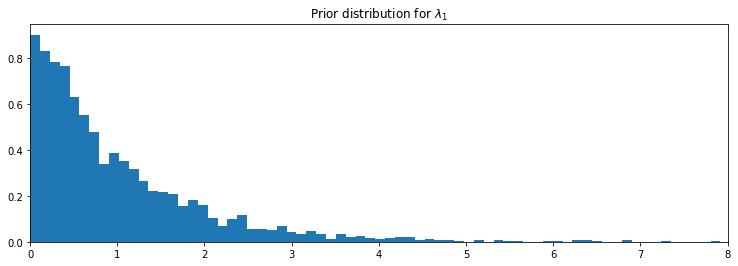

In [17]:
samples = lambda_1.random(size=2000)
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);